## 什么是优化器

[https://www.youtube.com/watch?v=Ym1m4Bh14ps](https://www.youtube.com/watch?v=Ym1m4Bh14ps)

* 用来寻找函数最小值
* 从数据中查找并建立参数化模型（从实验数据中找到一个多项式来拟合实验数据）
* 使用优化器来改善股票投资组合中的分配方式

In [1]:
import pandas as pd
import quantaxis_ext
from QUANTAXIS import QA_fetch_stock_day_adv
from QUANTAXIS import QA_fetch_index_day_adv
import ploter
import talib
import numpy as np
import settings
import units
import header
import calculator as calc
import matplotlib.pyplot as plt

#设定绘图的默认大小
import matplotlib
matplotlib.rcParams["figure.figsize"]=[16,5]

#加载 seaborn，并且设置默认使用 seaborn
import seaborn as sns
sns.set()

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['Noto Sans CJK SC','SimHei']
matplotlib.rcParams['axes.unicode_minus']=False #用来正常显示负号

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

In [2]:
START_VALS = 1000000 # 初始投资总额
START = '2018-01-01' # 初始投资日期
END = '2018-12-31' # 结束投资日期
# 投资组合：贵州茅台、中国平安、招商银行、格力电器
SYMBOLS = ['600519','601318','600036','000651'] 
# 比率分配
ALLOCS = [0.4,0.4,0.1,0.1]
ZS_CODE='000300'#指数代码。沪深300

In [19]:
def get_portfoilo(symbols, zs_code, start_date, end_date, start_values):
    """获取投资组合与指数的收益比较

    :param symbols: 投资组合
    :param zs_code: 指数代码
    :param start: 开始日期
    :param end: 结束日期
    :param allocs: 投资组合比率
    :param start_values: 初始总投资额
    :return: 包含指数的收盘价归一化后的数据
    """
    df=quantaxis_ext.fetch_index_stock_daily_adv(symbols,zs_code, start_date,end_date)
    normed = calc.calc_normalize_data(df)
    return normed

def plot_portfoilo(symbols, zs_code, start_date, end_date, allocs, start_values):
    normed = get_portfoilo(symbols, zs_code, start_date, end_date, start_values)
    alloced = normed.copy().drop('zs_'+ZS_CODE, axis=1) * allocs
    pos_vals = alloced * START_VALS
    port_val = pos_vals.sum(axis=1)
    normed_portfoilo=calc.calc_normalize_data(pd.DataFrame(port_val.copy(), columns=['投资组合']).join(normed['zs_'+ZS_CODE]))
    # normed_portfoilo.head(),normed_portfoilo.tail()
    normed_portfoilo.plot()
    plt.title('投资组合每日总价值与指数({4})间的对比\n投资组合：{0}\n分配比率：{1}\n周期：{2}~{3}'.format(symbols,allocs,start_date, end_date,zs_code))
    
    normed_portfoilo.tail(1)

### 投资组合每日总价值与指数间的对比

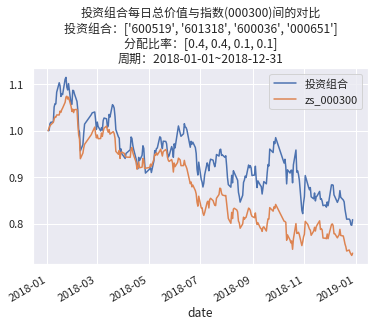

In [20]:
# 投资组合一年的表现与沪深300指数的比较
plot_portfoilo(SYMBOLS, ZS_CODE, START, END, ALLOCS, START_VALS)

### 修改投资组合分配比率

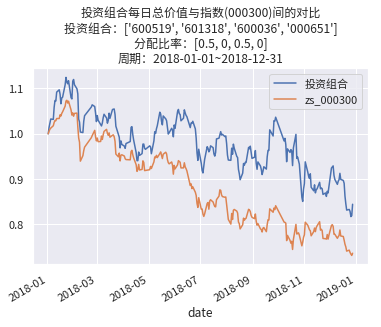

In [21]:
# 投资组合一年的表现与沪深300指数的比较
plot_portfoilo(SYMBOLS, ZS_CODE, START, END, [0.5,0,0.5,0], START_VALS)

## 关于组合优化的说明

* [https://en.wikipedia.org/wiki/Portfolio_optimization](https://en.wikipedia.org/wiki/Portfolio_optimization)

* [https://www.portfoliovisualizer.com/examples](https://www.portfoliovisualizer.com/examples)

* [https://stanford.edu/class/ee103/lectures/portfolio_slides.pdf](https://stanford.edu/class/ee103/lectures/portfolio_slides.pdf)

* [https://www.factorresearch.com/research-stock-portfolio-optimisation](https://www.factorresearch.com/research-stock-portfolio-optimisation)